In [296]:
import utils
import re
from collections import namedtuple

import pandas as pd

# visualization stuff
from IPython.display import clear_output, display, Markdown
from plotly.offline import iplot
import plotly.graph_objs as go
import ipywidgets as ipw

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Day 14: Reindeer Olympics

https://adventofcode.com/2015/day/14


This year is the Reindeer Olympics! Reindeer can fly at high speeds, but must rest occasionally to recover their energy. Santa would like to know which of his reindeer is fastest, and so he has them race.

Reindeer can only either be flying (always at their top speed) or resting (not moving at all), and always spend whole seconds in either state.

For example, suppose you have the following Reindeer:

- Comet can fly 14 km/s for 10 seconds, but then must rest for 127 seconds.
- Dancer can fly 16 km/s for 11 seconds, but then must rest for 162 seconds.

After one second, Comet has gone 14 km, while Dancer has gone 16 km. After ten seconds, Comet has gone 140 km, while Dancer has gone 160 km. On the eleventh second, Comet begins resting (staying at 140 km), and Dancer continues on for a total distance of 176 km. On the 12th second, both reindeer are resting. They continue to rest until the 138th second, when Comet flies for another ten seconds. On the 174th second, Dancer flies for another 11 seconds.

In this example, after the 1000th second, both reindeer are resting, and Comet is in the lead at 1120 km (poor Dancer has only gotten 1056 km by that point). So, in this situation, Comet would win (if the race ended at 1000 seconds).

Given the descriptions of each reindeer (in your puzzle input), after exactly 2503 seconds, **what distance has the winning reindeer traveled?**

In [250]:
data = utils.get_input(14).splitlines()
data[:3]

['Dancer can fly 27 km/s for 5 seconds, but then must rest for 132 seconds.',
 'Cupid can fly 22 km/s for 2 seconds, but then must rest for 41 seconds.',
 'Rudolph can fly 11 km/s for 5 seconds, but then must rest for 48 seconds.']

first up, looking at how to extract all the numbers from the line:

In [253]:
line = data[0]
[int(i) for i in re.findall(r"-?\d+", line)]

[27, 5, 132]

Getting the name:

In [255]:
re.search('([A-Z][a-z]+)', line).group()

'Dancer'

Now putting it all together:

In [256]:
details = []
reindeer = namedtuple("Reindeer", ["name", "speed", "time", "rest", "distance"])

for line in data:
    name = re.search('([A-Z][a-z]+)', line).group()
    deets = [name] + [int(i) for i in re.findall(r"-?\d+", line)] + [0]
    details.append(reindeer(*deets))
    
details[:3]

[Reindeer(name='Dancer', speed=27, time=5, rest=132, distance=0),
 Reindeer(name='Cupid', speed=22, time=2, rest=41, distance=0),
 Reindeer(name='Rudolph', speed=11, time=5, rest=48, distance=0)]

In [263]:
comet = reindeer("Comet",14,10,127, 0)
dancer = reindeer("Dancer", 16, 11, 162, 0)

def distance(r=comet, time=2503):
    """takes in a raindeer and time, returns distances travelled"""
    distance = 0
    total = r.time + r.rest
    distance += r.speed * r.time * (time // total)
    
    if (time % total) <= r.time:
        distance += (time % total) * r.speed
    else:
        distance += r.speed * r.time
        
    return distance

print(distance(comet, 1000), distance(dancer, 1000)) # should be (1120, 1056)

1120 1056


All right, so our distance function is working, so now to find the max distance travelled:

In [264]:
max([distance(r) for r in details])

2640

`2640` is the right answer for part 1,

# --- Part Two ---

Seeing how reindeer move in bursts, Santa decides he's not pleased with the old scoring system.

Instead, at the end of each second, he awards one point to the reindeer currently in the lead. (If there are multiple reindeer tied for the lead, they each get one point.) He keeps the traditional 2503 second time limit, of course, as doing otherwise would be entirely ridiculous.

Given the example reindeer from above, after the first second, Dancer is in the lead and gets one point. He stays in the lead until several seconds into Comet's second burst: after the 140th second, Comet pulls into the lead and gets his first point. Of course, since Dancer had been in the lead for the 139 seconds before that, he has accumulated 139 points by the 140th second.

After the 1000th second, Dancer has accumulated 689 points, while poor Comet, our old champion, only has 312. So, with the new scoring system, Dancer would win (if the race ended at 1000 seconds).

Again given the descriptions of each reindeer (in your puzzle input), after exactly 2503 seconds, how many points does the winning reindeer have?

---

for part 2, instead of a namedtuple I'm switching to using a pandas dataframe to make it easier to update numbers:

In [269]:
all_reindeer = {}
reindeer = namedtuple("Reindeer", ["name", "speed", "time", "rest", "distance", "points"])

for line in data:
    name = re.search('([A-Z][a-z]+)', line).group()
    speed, time, rest = [int(i) for i in re.findall(r"-?\d+", line)]
    all_reindeer[name] = {"speed":speed, "time":time, "rest":rest}
    
display(all_reindeer)

{'Dancer': {'speed': 27, 'time': 5, 'rest': 132},
 'Cupid': {'speed': 22, 'time': 2, 'rest': 41},
 'Rudolph': {'speed': 11, 'time': 5, 'rest': 48},
 'Donner': {'speed': 28, 'time': 5, 'rest': 134},
 'Dasher': {'speed': 4, 'time': 16, 'rest': 55},
 'Blitzen': {'speed': 14, 'time': 3, 'rest': 38},
 'Prancer': {'speed': 3, 'time': 21, 'rest': 40},
 'Comet': {'speed': 18, 'time': 6, 'rest': 103},
 'Vixen': {'speed': 18, 'time': 5, 'rest': 84}}

enter the dataframe:

In [270]:
df = pd.DataFrame.from_dict(all_reindeer, orient="index")
df["distance"] = 0
df["points"] = 0
df

,speed,time,rest,distance,points
Blitzen,14,3,38,0,0
Comet,18,6,103,0,0
Cupid,22,2,41,0,0
Dancer,27,5,132,0,0
Dasher,4,16,55,0,0
Donner,28,5,134,0,0
Prancer,3,21,40,0,0
Rudolph,11,5,48,0,0
Vixen,18,5,84,0,0


So now, I'm going to update the distance for each reindeer after each second, then give a point to the reindeers in the lead:

In [402]:
df = pd.DataFrame.from_dict(all_reindeer, orient="index")
df["distance"] = 0
df["points"] = 0
df

,speed,time,rest,distance,points
Blitzen,14,3,38,0,0
Comet,18,6,103,0,0
Cupid,22,2,41,0,0
Dancer,27,5,132,0,0
Dasher,4,16,55,0,0
Donner,28,5,134,0,0
Prancer,3,21,40,0,0
Rudolph,11,5,48,0,0
Vixen,18,5,84,0,0


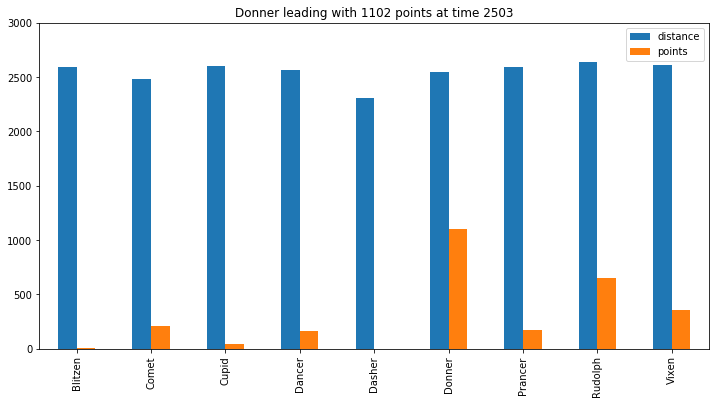

In [403]:
for t in range(1,2503+1):
    df["distance"] = df.apply(distance,time=t, axis=1)
    furthest = df.distance.max()
    df.loc[df.distance==furthest, "points"] += 1
    if t % 150 == 0 or t == 2503:
        clear_output(wait=True)
        df[["distance", "points"]].plot.bar(figsize=(12,6))
        winner = df[df.points==df.points.max()].index[0]
        plt.ylim(0,3000)
        plt.title(f"{winner} leading with {df.points.max()} points at time {t}")
        plt.show()

# Animations ahoy!

now to animate this properly in plotly or using matplotlib.animation. I'm making a list of positions and points at all points in time:



In [439]:
points, distances = [], []

df = pd.DataFrame.from_dict(all_reindeer, orient="index")
df["distance"] = 0
df["points"] = 0

for t in range(1,2503+1):
    df["distance"] = df.apply(distance,time=t, axis=1)
    furthest = df.distance.max()
    df.loc[df.distance==furthest, "points"] += 1
    
    points.append(df.points.values.copy())
    distances.append(df.distance.values.copy())
    
points[1000], distances[1000]

(array([  3, 169,  24,  63,   0, 521,  29,  45, 184]),
 array([1050, 1080, 1056, 1080,  924, 1120, 1071, 1045, 1080]))

In [428]:
names = df.index.values
names

array(['Blitzen', 'Comet', 'Cupid', 'Dancer', 'Dasher', 'Donner',
       'Prancer', 'Rudolph', 'Vixen'], dtype=object)

In [440]:
points[0:10]

[array([0, 0, 0, 0, 0, 1, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 2, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 3, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 4, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 5, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 6, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 7, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 8, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 9, 0, 0, 0]),
 array([ 0,  0,  0,  0,  0, 10,  0,  0,  0])]

In [449]:
points_vals = list(zip(*points))
distances_vals = list(zip(*distances))

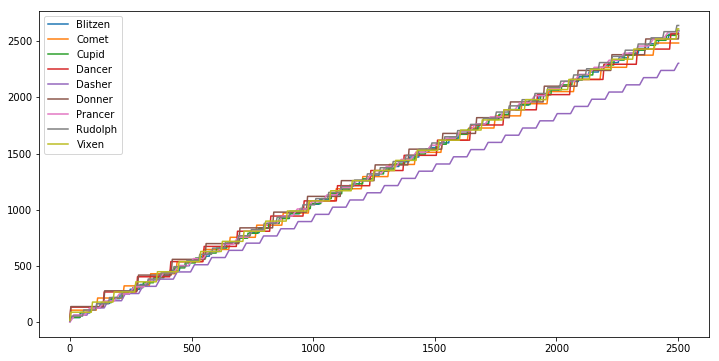

In [463]:
f, ax = plt.subplots(figsize=(12,6))
for line, name in zip(distances_vals, names):
    ax.plot(line, label=name)
plt.legend()
plt.show()

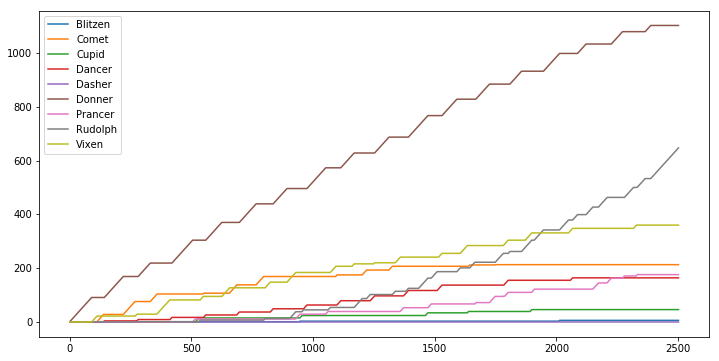

In [465]:
f, ax = plt.subplots(figsize=(12,6))
for line, name in zip(points_vals, names):
    ax.plot(line, label=name)
plt.legend()
plt.show()

## Now to do this in plotly

In [509]:
y_index = ipw.IntSlider(value=1, min=0, max=2503, step=1)
y_index

IntSlider(value=1, max=2503)

In [510]:
def update_fig(x):
    val = y_index.value
    
    for trace, p in zip(fig.data, points_vals):
        trace.y = p[:val]
    
y_index.observe(update_fig, names='value')

In [514]:
data = []
x = np.arange(1, 2503+1)

for name, p in zip(names, points_vals):
    data.append(go.Scatter(x=x, y=p, name=name))

layout = go.Layout(title="This is a title", 
                   xaxis=dict(title="Time", range=[0,2600]), 
                   yaxis=dict(title="Distance", range=[0,1000]))

fig = go.FigureWidget(data=data, layout=layout)

display(widgets.VBox([y_index, fig]))

    'data': [{'name': 'Blitzen',
              …

In [368]:
y_index = ipw.IntSlider(value=0, min=0, max=len(y), step=1)
y_index

IntSlider(value=0)

In [374]:
def test_hander(x):
    val = y_index.value
    fig.data[0].y = y[val]
    fig.layout.title = f"{x}  {x['new']}"
    
y_index.observe(test_hander, names='value')

In [375]:
t = go.Scatter(x=x, y=y[0])
layout = go.Layout(title="This is a title", 
                   xaxis=dict(title="X axis title"), yaxis=dict(title="Y"))
fig = go.FigureWidget([t], layout)

display(widgets.VBox([y_index, fig]))

    'data': [{'type': 'scatter',
              'uid': 'a94d…

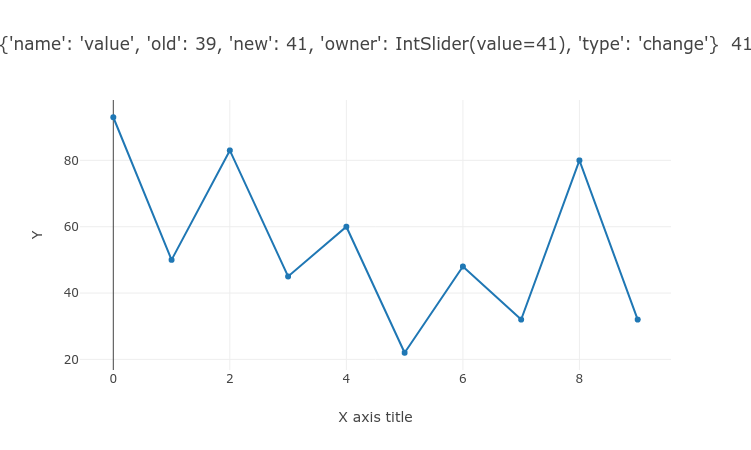

In [405]:
iplot(fig)